# <center> Manual Customer Segmentation Using RFM Clustering </center>

- Author : Arya Octavian
- Workshop : Customer Segmentation Using RFM Clustering by Tokopedia Academy (https://academy.tokopedia.com/events/data-workshop)
- Tutor : Misael Natanael (Data Analyst from Tokopedia)

<b> disclaimer : The original code was made by Tokopedia Academy team, I just recreate it with my own version for study purpose.

## Import Data

In [1]:
# Library for data manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv('Online Retail.csv')

#always display data with randomized sample
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
231257,557258,22196,SMALL HEART MEASURING SPOONS,12,6/19/11 10:35,0.85,12951.0,United Kingdom
438848,574336,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,11/4/11 9:52,1.95,12397.0,Belgium
39688,539659,20725,LUNCH BAG RED RETROSPOT,20,12/21/10 9:47,1.65,15034.0,United Kingdom
342868,566914,84978,HANGING HEART JAR T-LIGHT HOLDER,12,9/15/11 14:08,1.25,15466.0,United Kingdom
88118,543770,20718,RED RETROSPOT SHOPPER BAG,10,2/11/11 15:39,1.25,13875.0,United Kingdom
456240,575681,84006,MAGIC TREE -PAPER FLOWERS,1,11/10/11 15:32,0.85,16903.0,United Kingdom
7397,537036,22467,GUMBALL COAT RACK,1,12/3/10 17:28,2.55,15545.0,United Kingdom
332037,566053,20724,RED RETROSPOT CHARLOTTE BAG,1,9/8/11 14:57,0.85,14410.0,United Kingdom
537727,581334,22464,HANGING METAL HEART LANTERN,1,12/8/11 12:07,0.79,17841.0,United Kingdom
519500,580148,72349b,SET/6 PURPLE BUTTERFLY T-LIGHTS,2,12/2/11 10:08,4.13,NaN,United Kingdom


The following dataset is a transaction history data from online retailers in Europe (open-source data)

## Statistical Descriptive

In [3]:
# Checking dataset attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


From the output above :
- Dataset contains 541909 rows and 8 columns
- There are NULL values in some columns(features)
- The `InvoiceDate` column is still in the object datatype. <b> We need to change it later.

In [4]:
# Checking missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Checking duplicated values
print('Any duplicates? :', df.duplicated().any())
print('Total duplicates :', df.duplicated().sum())

Any duplicates? : True
Total duplicates : 5268


In [6]:
# Skimming duplicated (optional)
df.loc[df.duplicated(), :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


In [7]:
# Handling NULL values
df = df.dropna(subset=['CustomerID'])

print('Null values :', df.isnull().sum().sum())

Null values : 0


In [8]:
# Handling duplicated data
df = df.drop_duplicates()

print('Total duplicates :', df.duplicated().sum())

Total duplicates : 0


## Data Engineering

In [9]:
# Statistics of numerical features
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


From the output above :
- The min of the `Quantity` column has negative values which means there are "canceled orders".
- The min of the `Unit Price` column has zero values which means there are "free products".
- We need to avoid using that particular data when we want to segment our customers.

In [10]:
# Filtering dataset
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe() 

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494693,578270,84832,ZINC WILLIE WINKIE CANDLE STICK,1,11/23/11 13:39,1.63,14096.0,United Kingdom
298775,563037,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,8/11/11 15:02,1.65,12362.0,Belgium
134889,547871,22176,BLUE OWL SOFT TOY,2,3/27/11 14:28,2.95,16931.0,United Kingdom
489414,578016,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,3,11/22/11 13:02,3.75,14506.0,United Kingdom
241161,558194,51014L,"FEATHER PEN,LIGHT PINK",12,6/27/11 12:28,0.39,14583.0,United Kingdom


In [12]:
df.shape

(392692, 8)

In [13]:
# Changing InvoiceDate datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [15]:
# New Total Sum Column representing total spending of each customer 
df['TotalSum'] = df['UnitPrice']* df['Quantity']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [16]:
# Min and Max Invoice Date in the dataset. Min = Oldest Transaction, Max = Latest Transaction
print('Min Invoice Date:',df.InvoiceDate.dt.date.min(), ',',
      'Max Invoice Date:',df.InvoiceDate.dt.date.max())

Min Invoice Date: 2010-12-01 , Max Invoice Date: 2011-12-09


- In the reality, we will work with the most recent snapshot of today's or yesterday's data.
- So we need to make our own snapshot date so the data can be analyized easily.
- A snapshot is a set of reference markers for data at a specific point in time.

## Data Transformation

In [17]:
# The last transaction date is 2011-12-09
# To calculate the shopping day periods (Recency)
# We need to set a snapshot date. Let's say we set that one day after the latest one
# So the snapshot date will be 2011-12-10

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [18]:
# Calculate RFM metrics
# The Different days of snapshot_date and InvoiceDate for Recency
# Count of InvoiceNo for Frequency
# Sum of TotalSum for Monetary

# We do this by aggregating them for each CustomerID
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
                                      'InvoiceNo':'count',
                                      'TotalSum': 'sum'})

# lambda function : it gives the number of days between hypothetical today and the last transaction

In [19]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [20]:
#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'}
           ,inplace= True)

#Final RFM values
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


## RFM Segment and RFM Score

In [23]:
# Building RFM segments
r_labels=range(4,0,-1) # The higher the value, the fewer days the customer returned for shopping (inversely proportional)
f_labels=range(1,5) # The higher the value, the higher the customer shopping frequency (directly proportional).
m_labels=range(1,5) # The higher the value, the higher the customer total spending for shopping (directly proportional).

# Use quartile for segmenting every features performance
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)

rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


<B> Run the code above 2 times so the `RFM_Segment` will turn into the exact number

In [24]:
# Check Data
rfm[rfm['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12353.0,204,4,89.00,1,1,1,111,3
12361.0,287,10,189.90,1,1,1,111,3
12401.0,303,5,84.30,1,1,1,111,3
12402.0,323,11,225.60,1,1,1,111,3
12441.0,367,11,173.55,1,1,1,111,3


- By using the rfm dataset above we can find insight for business purpose

In [25]:
rfm_score = rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'MonetaryValue': ['mean', 'count'] }).round(1)
rfm_score.sort_values('RFM_Score', ascending = False)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
12            7.2     367.8        9285.9   450
11           21.3     186.9        4062.0   387
10           32.4     110.5        2056.4   426
9            45.9      78.7        1795.1   414
8            64.1      56.0         987.3   454
7            79.6      38.0         758.1   463
6            95.9      27.9         820.8   457
5           152.9      21.2         366.6   518
4           177.2      13.6         240.0   388
3           260.7       8.2         157.4   381

- From the highest RFM score, it is safe to say that the fastest period of customer will be back for shopping in 7 days (on average).
- From the lowest RFM score, there are about 381 customers that only order 8 times but have such a gap of recency.
- From the lowest RFM score, customers with high recency barely spend their money in our online retail.

In [26]:
# Manual Segmentation
# For simplicity, use R score and F score only to do labeling, because M score is already directly proportional with F score
# So the M score will be the independent variable

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2]3': 'At Risk',
    r'[1-2]4': 'Can\'t Loose',
    r'31': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'32': 'New Customers',
    r'[4-5]2': 'Potential Loyalists',
    r'43': 'Champions'
    }

In [27]:
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment check'] = rfm['Segment']
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment,Segment check
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Hibernating,11
12347.0,2,182,4310.00,4,4,4,444,12,Loyal Customers,44
12348.0,75,31,1797.24,2,2,4,224,8,Hibernating,22
12349.0,19,73,1757.55,3,3,4,334,10,Need Attention,33
12350.0,310,17,334.40,1,1,2,112,4,Hibernating,11


In [28]:
rfm_final = rfm.copy()

In [29]:
rfm_final = rfm_final.rename(columns={'MonetaryValue': 'Monetary'})
rfm_final = rfm_final.drop('RFM_Score', axis=1)
rfm_final.groupby('Segment').mean().sort_values('Monetary', ascending = False)

,Recency,Frequency,Monetary
Segment,,,
Loyal Customers,16.204778,285.177474,6269.696337
Can't Loose,107.412935,158.572139,2408.463537
Promising,9.990909,9.309091,2137.812091
Champions,9.174061,68.058020,1874.569522
Need Attention,31.174051,66.034810,1315.623864
At Risk,136.448802,63.278867,1080.929085
Potential Loyalists,9.628743,29.107784,906.732934
New Customers,33.979424,28.584362,628.011728
Hibernating,183.479866,17.279195,552.501209


- Now, we can determine our own business strategy or action towards each segmentation based on the average value of recency, frequency, and monetary.

## RFM Visualization

In [30]:
# Before creating a graph, first we group every label segmentation by total of customers

rfm_graph = rfm.copy()
rfm_graph['CustomerID'] = rfm_graph.index

# Calculate sum of points for each segmentation
rfm_graph = rfm_graph[['Segment','CustomerID']].groupby(['Segment']).count()
rfm_graph['Ratio'] = round(rfm_graph['CustomerID'] / sum(rfm_graph['CustomerID']) * 100)
rfm_graph.sort_values('CustomerID', ascending = False)

,CustomerID,Ratio
Segment,,
Hibernating,1490,34.0
Loyal Customers,879,20.0
At Risk,459,11.0
Need Attention,316,7.0
Champions,293,7.0
New Customers,243,6.0
Can't Loose,201,5.0
About to Sleep,180,4.0
Potential Loyalists,167,4.0


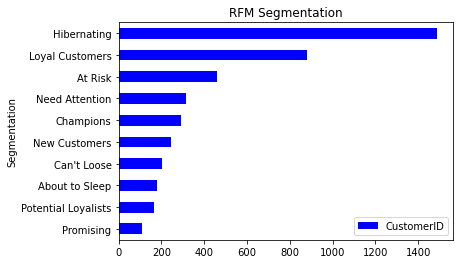

In [31]:
# Creating a graph
rfm_graph['Segmentation'] = rfm_graph.index
rfm_graph.sort_values('CustomerID', ascending = True).plot.barh(x='Segmentation', y='CustomerID', title='RFM Segmentation', color='blue')
plt.show()

- From the insight above we can conclude that there are 34% of `Hibernating` customer, 20% of `Loyal Customers`, 11% of `At Risk` customer.
- We can give different treatments to each segment based on priority by looking at costs and the marketing budget.

for example :
- Because our online retail is dominated by the hibernating customer, so it puts us in a chaotic situation. Hence, the business team needs to run a big campaign with a lot of ads and push notifications for the hibernating customer. Giving a cashback promo is so popular these days to regain the attention of customers toward our retail.